In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit


from sklearn.decomposition import PCA

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import Both the Datasets

In [2]:
df1=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Max_solar_data.csv')
df2=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Lim_solar_data.csv')

df = pd.concat([df1,df2], ignore_index=True, axis=0)


In [3]:
df

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000041,2.369843,90.429688,147.949219,0.616820,-0.530396,-0.160283,-146.003418,120.255127,25.595601,1.000000,50.000000,1.000000,50.000000,F0M
1,0.010040,2.378357,90.368652,148.242188,-0.678956,0.570679,0.047847,148.546906,-119.881439,-24.723663,1.000000,50.000000,1.000000,50.000000,F0M
2,0.020039,2.373627,90.460205,148.535156,0.603393,-0.537109,-0.187139,-145.027008,120.315399,26.109924,1.000000,50.000000,1.000000,50.000000,F0M
3,0.030038,2.368896,90.423584,148.242188,-0.685670,0.570679,0.041133,147.341461,-119.736786,-26.105906,0.440380,50.078491,118.275197,49.921509,F0M
4,0.040037,2.362274,90.435791,148.242188,0.630248,-0.523682,-0.166997,-143.279114,120.942230,26.680501,0.618996,50.248673,90.022162,49.606494,F0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,14.358892,1.531647,102.056885,142.675781,0.354979,-0.503540,0.148555,-108.381500,152.585144,-40.760091,0.519110,50.036816,155.672324,49.999645,F7L
21632,14.368891,1.565704,101.104736,143.261719,-0.403687,0.523682,-0.126714,110.756226,-149.559479,43.311615,0.519713,50.087054,155.706972,49.992937,F7L
21633,14.378890,1.501373,101.556396,142.968750,0.361693,-0.530396,0.182124,-108.803406,152.319946,-40.470785,0.522856,50.138598,155.636851,49.996147,F7L
21634,14.388889,1.492859,100.970459,143.847656,-0.396974,0.537109,-0.106572,110.720062,-150.451508,42.560221,0.525012,49.932554,155.571019,50.008771,F7L


In [13]:
df['label'].unique()

array(['F0M', 'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M', 'F0L',
       'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L'], dtype=object)

# Divide the dataset into Train-test split  and do the standard scalling

In [14]:
def split_transform(df,split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

In [15]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.001)

The number of samples in the Training set is 21614
The number of samples in the Test set is 22


# Do Model training

In [7]:
def Model_with_cross_val(df,clf,k_fold,test_size):
    # Split transform the data
    X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.01)
    print("")
    #Generate k-fold with shuffled split
    cv = ShuffleSplit(n_splits=k_fold, test_size=test_size)
    
    # get score for each split
    scores = cross_val_score(clf, X_sc_train,y_train, cv=cv, n_jobs=-1)
    
    #print scores with mean and std
    print(scores)
    
    print("{} accuracy with a standard deviation of {}".format(np.mean(scores),np.std(scores)))
    print("")




In [16]:
clf = RandomForestClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.98397137 0.98630563 0.98770619 0.98459384 0.98677249]
0.9858699035169624 accuracy with a standard deviation of 0.0013863092095437156



# Decision Trees

In [17]:
clf = DecisionTreeClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.96483038 0.96016184 0.96451914 0.96016184 0.96374105]
0.9626828509181451 accuracy with a standard deviation of 0.0020887596309446346



# SVM

In [18]:
clf = SVC()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.94148771 0.94117647 0.93417367 0.94024276 0.94397759]
0.9402116402116404 accuracy with a standard deviation of 0.0032618916916461542



# KNN

In [19]:
clf = KNeighborsClassifier(n_neighbors=5)
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.95362589 0.95440398 0.94989107 0.94833489 0.9475568 ]
0.9507625272331154 accuracy with a standard deviation of 0.002770871007040763



# Logistic Reg

In [20]:
clf = LogisticRegression()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.74338624 0.73498288 0.73607221 0.7482104  0.74696545]
0.7419234360410831 accuracy with a standard deviation of 0.005468011891496283



# Do prediction with best performing Model

The number of samples in the Training set is 17308
The number of samples in the Test set is 4328


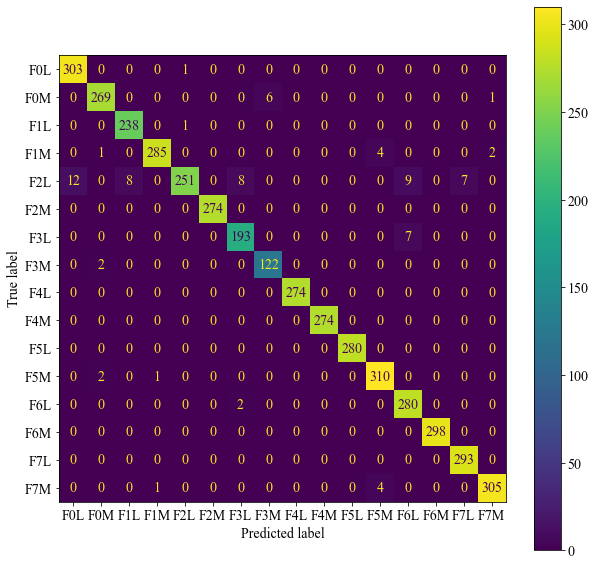

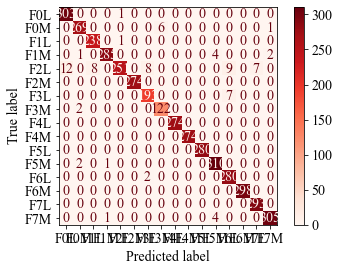

In [21]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.2)

Model = RandomForestClassifier()
Model.fit(X_sc_train,y_train)

fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_estimator(
    Model,
    X_sc_test,
    y_test,
    display_labels=Model.classes_,
    cmap=plt.cm.Reds
)


disp.plot(ax=ax)


# -------------------------------------- We will reduce the features to 7-faults -------------

## ['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']

# Making Categorical Variable of L and M

In [35]:
df1=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Max_solar_data.csv')
df2=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Lim_solar_data.csv')

In [36]:
for i in range (len(df1)):    
    cls = df1['label'][i]
    cls = cls[:-1]
    df1['label'][i] = cls
df1.insert(1, "mode", 0)    
    
for i in range (len(df2)):    
    cls = df2['label'][i]
    cls = cls[:-1]
    df2['label'][i] = cls    
    
df2.insert(1, "mode", 1)    

C:\Users\mohan\AppData\Local\Temp/ipykernel_11784/2509062435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'][i] = cls
C:\Users\mohan\AppData\Local\Temp/ipykernel_11784/2509062435.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'][i] = cls


In [37]:
df = pd.concat([df1,df2], ignore_index=True, axis=0)
#df = df.drop(columns=['ia','ib','ic'])# Drop highly correlated features
df.head()

,Time,mode,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000041,0,2.369843,90.429688,147.949219,0.616820,-0.530396,-0.160283,-146.003418,120.255127,25.595601,1.000000,50.000000,1.000000,50.000000,F0
1,0.010040,0,2.378357,90.368652,148.242188,-0.678956,0.570679,0.047847,148.546906,-119.881439,-24.723663,1.000000,50.000000,1.000000,50.000000,F0
2,0.020039,0,2.373627,90.460205,148.535156,0.603393,-0.537109,-0.187139,-145.027008,120.315399,26.109924,1.000000,50.000000,1.000000,50.000000,F0
3,0.030038,0,2.368896,90.423584,148.242188,-0.685670,0.570679,0.041133,147.341461,-119.736786,-26.105906,0.440380,50.078491,118.275197,49.921509,F0
4,0.040037,0,2.362274,90.435791,148.242188,0.630248,-0.523682,-0.166997,-143.279114,120.942230,26.680501,0.618996,50.248673,90.022162,49.606494,F0


In [38]:
df['mode'].unique()

array([0, 1], dtype=int64)

In [39]:
print("Random Forest")
clf = RandomForestClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)
print("")
print("Decision Tree")
clf = DecisionTreeClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)
print("")
print("Support Vector Machines")
clf = SVC()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)
print("")
print("KNN")
clf = KNeighborsClassifier(n_neighbors=5)
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)
print("")
print("Logistic Regression")
clf = LogisticRegression()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)
print("")
print("Naive Byes")
clf = GaussianNB()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

Random Forest
The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.98661687 0.9869281  0.98552754 0.98646125 0.98755058]
0.9866168689698102 accuracy with a standard deviation of 0.0006602304212759419


Decision Tree
The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.96140678 0.96374105 0.96981015 0.96514161 0.96794273]
0.9656084656084655 accuracy with a standard deviation of 0.0029820204337387963


Support Vector Machines
The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.93744164 0.94164332 0.94070962 0.94288827 0.93899782]
0.9403361344537814 accuracy with a standard deviation of 0.001925137515616829


KNN
The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.95331466 0.95409275 0.94989107 0.95502646 0.95066916]
0.9525988173046998 accuracy with a standard deviation of 0.0019845998838381312


Logis

The number of samples in the Training set is 15145
The number of samples in the Test set is 6491


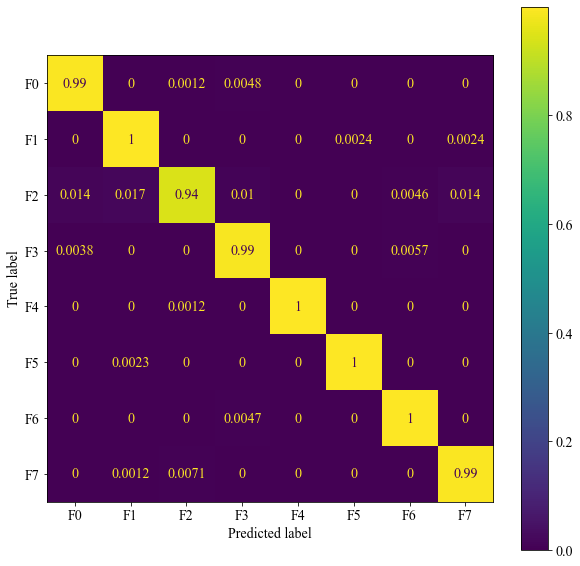

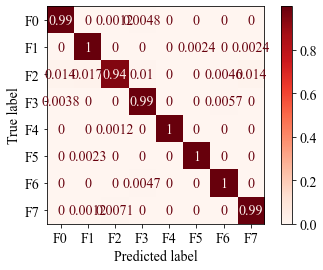

In [95]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.3)

Model = RandomForestClassifier()
Model.fit(X_sc_train,y_train)

fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_estimator(
    Model,
    X_sc_test,
    y_test,
    display_labels=Model.classes_
)



